In [1]:
# https://towardsdatascience.com/this-is-how-reinforcement-learning-works-5080b3a335d6
# using the Bellman equation, we find the action providing the highest value for the given state s. 
# V is the list of values of all states
def choose_best_action(env, V, s, gamma):
    a_best = None
    q_best = float('-inf')
    nb_actions = env.action_space.n
    for a in range (0, nb_actions):
        env.env.s = s # go to state s
        s_next, r, done, info = env.step(a) #take the action a
        q = r + gamma * V[s_next] # compute the value future value after taking action a
        if q > q_best:
            q_best = q
            a_best = a
    return a_best




In [2]:

import gym
from gym.envs.registration import register
from gym.envs.toy_text.frozen_lake import generate_random_map


env_name = 'FrozenLake-v0'

random_map = generate_random_map(size=16, p=0.8)
env = gym.make(env_name, desc=random_map, is_slippery = False)
#env = gym.make(env_name)
env.reset()
env.render()



SFFFFFFFHFFFFHFF
FHFFFFFFFFHFFFFF
FFFFFHHFFHFFHFFH
FFHFFHFFFHHHFFHF
FFFFFFFFHFFHFHFF
HFFFFFFFFFFFFHFF
FFFHFHFFFFFFFFFF
HFFFFHHFFFFFFFFF
FHFFFFHFFHHFHFFF
FFFFHFFFFFFFFFHH
FFFFFFHFHFFFFFFH
FFFFFHFFFFFFFFFF
FFHFFFHFFFFFFFFH
HFFFFFFFFFFFHFFF
FHHFFHFFFFFFFHFF
FFFFFFFFFFFFFFFG


In [3]:
# function for displaying a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
def display_value_iteration(P, V, env = env):
    nb_states = env.observation_space.n
    visited_states = np.zeros(nb_states).astype(bool)
    visited_states[0] = 1
    states_labels = np.where(P==0, '<', 
                              np.where(P==1, '>', 
                                       np.where(P==2, 'v', 
                                                np.where(P==3, '^', P)
                                               )
                                      )
                             ) 
    desc = env.unwrapped.desc.ravel().astype(str)
    colors = np.where(desc=='S','y',np.where(desc=='F','b',np.where(desc=='H','r',np.where(desc=='G','g',desc))))
    states_labels = np.zeros(nb_states).astype(str)
    states_labels[:] = ''
    iter_no = 1
    total_reward = 0
    s = env.reset()
    done = False
    while done != True:
        best_a = P[s] # select the best next action from the policy
        states_labels[s] = '^' if best_a==0 else ('v' if best_a==1 else ('>' if best_a==2 else '<'))           
        s, rew, done, info = env.step(best_a) #take step using selected action
        print(iter_no, s, P[s], best_a, s, rew, done, info)
        total_reward = total_reward + rew
        #visited_states[s] = 1 # mark the state as visited
        iter_no += 1
        #env.render()
    plt.figure(figsize=(20,10)) 
    ax = sns.heatmap(P.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))), 
                 linewidth=0.5, 
                 annot=states_labels.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))), 
                 cmap=list(colors),
                 fmt = '',
                 cbar=False)
    plt.show()
    print("Total Reward: ", total_reward, " ",iter_no)
    

In [4]:
# value iteration algorithm
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import gym
from gym import wrappers
from gym.envs.toy_text.frozen_lake import generate_random_map

def compute_value_iteration(
        #env = gym.make('FrozenLakeNotSlippery-v0'),
        env,
        gamma, v_delta_threshold=.001,
        V = None, verbose=True):
    env.reset()
    nb_actions = env.action_space.n
    nb_states = env.observation_space.n
    # values vector
    if V == None:
        V = np.zeros([nb_states])
    # policy vector
    P = np.zeros([nb_states], dtype=int)
    Reward = np.zeros([nb_states], dtype=int)
    iteration = 0
    while True:

        v_delta = 0
        for s in range (0, nb_states):
            v_previous = V[s]
            a_best = choose_best_action(env, V, s, gamma) # find an action with the highest future reward
            env.env.s = s # go to the state s
            s_next, r, done, info = env.step(a_best) #take the best action
            V[s] = r + gamma * V[s_next] # update the value of the state
            P[s] = a_best # store the best action in the policy vector for the state
            v_delta = max(v_delta, np.abs(v_previous - V[s])) # calculate the rate of value improvment for the state
        iteration += 1
        if v_delta < v_delta_threshold:
            if verbose:
                print ('Value : ',iteration,' iterations done')
            break
    return V, P

# compute values for a 4x4 board
gamma = 0.8
V_4, P_4 = compute_value_iteration(env, gamma)
print("V ",V_4)
print("P ",P_4)

#env = gym.make('FrozenLakeNotSlippery-v0')
desc = env.unwrapped.desc.ravel().astype(str)
env.render()
desc

Value :  31  iterations done
V  [0.00154743 0.00193428 0.00241785 0.00302231 0.00377789 0.00472237
 0.00590296 0.0073787  0.         0.0073787  0.00922337 0.01152922
 0.01441152 0.         0.01441152 0.01152922 0.00193428 0.
 0.00302231 0.00377789 0.00472237 0.00590296 0.0073787  0.00922337
 0.0073787  0.00590296 0.         0.01441152 0.0180144  0.022518
 0.0180144  0.01441152 0.00241785 0.00302231 0.00377789 0.00472237
 0.00590296 0.         0.         0.01152922 0.00922337 0.
 0.00922337 0.01152922 0.         0.0281475  0.022518   0.
 0.00302231 0.00377789 0.         0.00590296 0.0073787  0.
 0.01152922 0.01441152 0.01152922 0.         0.         0.
 0.04398047 0.03518437 0.         0.03518437 0.00377789 0.00472237
 0.00590296 0.0073787  0.00922337 0.01152922 0.01441152 0.0180144
 0.         0.0281475  0.03518437 0.         0.05497558 0.
 0.05497558 0.04398047 0.         0.00590296 0.0073787  0.00922337
 0.01152922 0.01441152 0.0180144  0.022518   0.0281475  0.03518437
 0.04398047 0.

array(['S', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F',
       'H', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'H',
       'F', 'F', 'H', 'F', 'F', 'H', 'F', 'F', 'H', 'F', 'F', 'H', 'F',
       'F', 'H', 'F', 'F', 'F', 'H', 'H', 'H', 'F', 'F', 'H', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'H', 'F', 'H',
       'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'H', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F',
       'H', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H',
       'F', 'F', 'F', 'F', 'H', 'F', 'F', 'H', 'H', 'F', 'H', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'H', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'H',
       'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F

In [5]:
# function for performing policy iteration
def compute_policy_iteration(env,gamma, v_delta_threshold=.01,P = None, verbose=True):
    env.reset()
    nb_actions = env.action_space.n
    nb_states = env.observation_space.n
    # values vector
    V = np.zeros([nb_states])
    # policy vector
    if P == None:
        P = np.random.choice(nb_actions, size=nb_states)
        
    max_iterations = 200000
    iteration = 0
    for i in range(max_iterations):
        
        # policy evaluation
        while True:
            v_delta = 0
            for s in range (0, nb_states):
                v_previous = V[s]                
                env.env.s = s # go to state s
                s_next, r, done, info = env.step(P[s]) #take the action recommended by policy
                V[s] = r + gamma * V[s_next] # update value after applying policy
                v_delta = max(v_delta, np.abs(v_previous - V[s])) # calculate the rate of value improvment for the state
            if v_delta < v_delta_threshold:
                break

        # policy improvement
        policy_stable = True
        for s in range (0, nb_states):
            a_old = P[s] # ask policy for action to perform
            a_best = choose_best_action(env, V, s, gamma) # find an action with the highest future reward    
            P[s] = a_best # store the best action in the policy vector for the state
            if a_old != a_best:
                policy_stable = False
        
        if policy_stable:
            break
                
        iteration += 1
    if verbose:
        print ('Policy : ',iteration,' iterations done')    
    return V, P
    
Vp_4, Pp_4 = compute_policy_iteration(env,gamma)
Vp_4
#display_value_iteration(Pp_4)
print("Vp ",Vp_4)
print("Pp ",Pp_4)

#env = gym.make('FrozenLakeNotSlippery-v0')
desc = env.unwrapped.desc.ravel().astype(str)
env.render()
desc

Policy :  30  iterations done
Vp  [0.00154743 0.00193428 0.00241785 0.00302231 0.00377789 0.00472237
 0.00590296 0.0073787  0.         0.0073787  0.00922337 0.01152922
 0.01441152 0.         0.01441152 0.01152922 0.00193428 0.
 0.00302231 0.00377789 0.00472237 0.00590296 0.0073787  0.00922337
 0.0073787  0.00590296 0.         0.01441152 0.0180144  0.022518
 0.0180144  0.01441152 0.00241785 0.00302231 0.00377789 0.00472237
 0.00590296 0.         0.         0.01152922 0.00922337 0.
 0.00922337 0.01152922 0.         0.0281475  0.022518   0.
 0.00302231 0.00377789 0.         0.00590296 0.0073787  0.
 0.01152922 0.01441152 0.01152922 0.         0.         0.
 0.04398047 0.03518437 0.         0.03518437 0.00377789 0.00472237
 0.00590296 0.0073787  0.00922337 0.01152922 0.01441152 0.0180144
 0.         0.0281475  0.03518437 0.         0.05497558 0.
 0.05497558 0.04398047 0.         0.00590296 0.0073787  0.00922337
 0.01152922 0.01441152 0.0180144  0.022518   0.0281475  0.03518437
 0.04398047 

array(['S', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F',
       'H', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'H',
       'F', 'F', 'H', 'F', 'F', 'H', 'F', 'F', 'H', 'F', 'F', 'H', 'F',
       'F', 'H', 'F', 'F', 'F', 'H', 'H', 'H', 'F', 'F', 'H', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'H', 'F', 'H',
       'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'H', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F',
       'H', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H',
       'F', 'F', 'F', 'F', 'H', 'F', 'F', 'H', 'H', 'F', 'H', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'H', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'H',
       'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F

In [6]:
# function for performing value and policy iterations for given gamma
def gammas_training(method, 
                    gammas = np.arange(0, 1, 0.1),
                    env=env):
    df = pd.DataFrame(columns=['gamma','state','value'])
    for gamma in gammas:
        if method == 'value_iteration':
            V, P = compute_value_iteration(env=env, gamma=gamma, verbose=False)
        else:
            V, P = compute_policy_iteration(env=env, gamma=gamma, verbose=False)
        df = df.append(pd.DataFrame({'gamma':[gamma for i in range(0,env.observation_space.n)],
                                'state':[i for i in range(0,env.observation_space.n)],
                                'value': V}))
    df.state=df.state.astype(int)
    return df

Text(0.5, 1.0, 'POLICY ITERATION - Values per gamma')

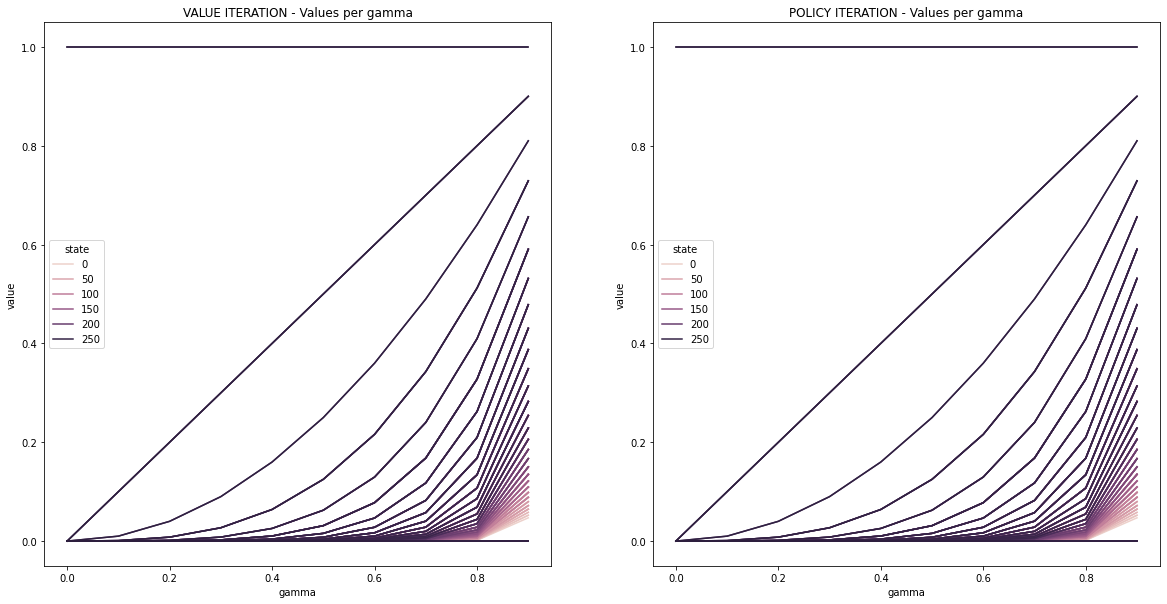

In [7]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
df_4_v = gammas_training(method='value_iteration', env=env)
sns.lineplot(data=df_4_v, x='gamma', y='value', hue='state', ax=ax[0])
ax[0].set_title('VALUE ITERATION - Values per gamma')

df_4_i = gammas_training(method='policy_iteration', env=env)
sns.lineplot(data=df_4_i, x='gamma', y='value', hue='state', ax=ax[1])
ax[1].set_title('POLICY ITERATION - Values per gamma')

P_4  [1 2 1 1 1 1 1 1 0 2 2 1 1 0 1 0 1 0 1 1 1 2 2 1 0 0 0 2 2 1 0 0 1 1 2 1 1
 0 0 1 0 0 2 3 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 2 1 1 1 1 1 1 1 0 1
 1 0 1 0 1 0 0 1 1 2 1 2 1 1 1 1 1 1 1 0 1 0 2 1 1 0 1 0 2 1 1 1 1 1 1 1 0
 0 0 2 1 1 1 0 0 1 1 2 2 1 2 1 0 0 1 0 1 1 2 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1
 0 2 2 1 2 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 2 1 1 0 2 1 1
 1 1 1 1 1 1 0 2 1 0 1 1 1 0 1 1 1 1 1 2 1 1 0 0 2 2 1 1 2 1 1 1 1 1 1 0 2
 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
V_4  [0.00154743 0.00193428 0.00241785 0.00302231 0.00377789 0.00472237
 0.00590296 0.0073787  0.         0.0073787  0.00922337 0.01152922
 0.01441152 0.         0.01441152 0.01152922 0.00193428 0.
 0.00302231 0.00377789 0.00472237 0.00590296 0.0073787  0.00922337
 0.0073787  0.00590296 0.         0.01441152 0.0180144  0.022518
 0.0180144  0.01441152 0.00241785 0.00302231 0.00377789 0.00472237
 0.00590296 0.         0.         0.01152922 0.00922337 0.
 0.00922337 0.01152

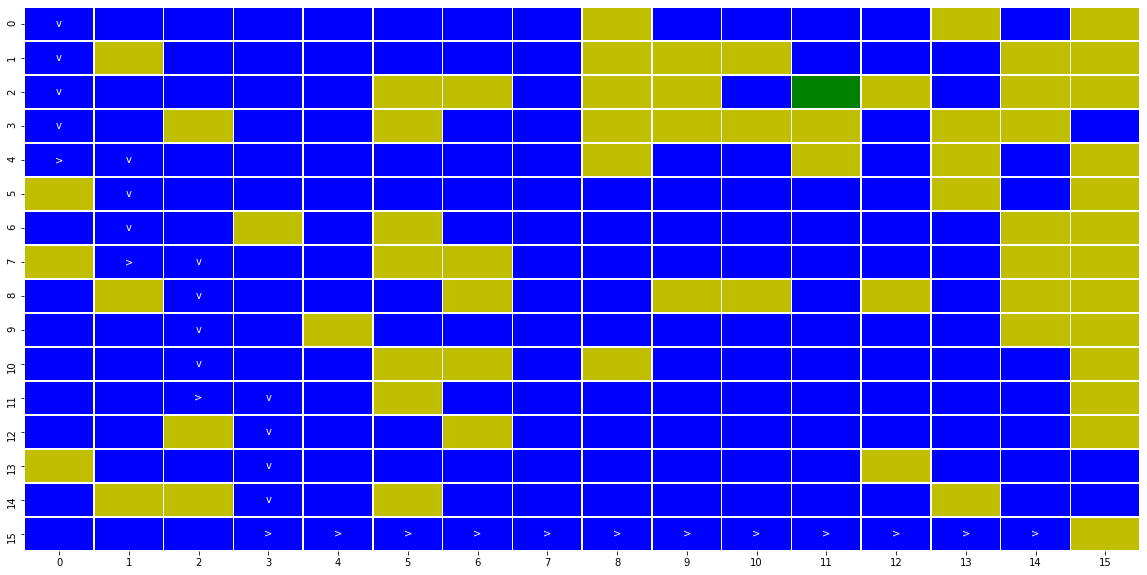

Total Reward:  1.0   31
1 16 1 1 16 0.0 False {'prob': 1.0}
2 32 1 1 32 0.0 False {'prob': 1.0}
3 48 1 1 48 0.0 False {'prob': 1.0}
4 64 2 1 64 0.0 False {'prob': 1.0}
5 65 1 2 65 0.0 False {'prob': 1.0}
6 81 1 1 81 0.0 False {'prob': 1.0}
7 97 1 1 97 0.0 False {'prob': 1.0}
8 113 2 1 113 0.0 False {'prob': 1.0}
9 114 1 2 114 0.0 False {'prob': 1.0}
10 130 1 1 130 0.0 False {'prob': 1.0}
11 146 1 1 146 0.0 False {'prob': 1.0}
12 162 1 1 162 0.0 False {'prob': 1.0}
13 178 2 1 178 0.0 False {'prob': 1.0}
14 179 1 2 179 0.0 False {'prob': 1.0}
15 195 1 1 195 0.0 False {'prob': 1.0}
16 211 1 1 211 0.0 False {'prob': 1.0}
17 227 1 1 227 0.0 False {'prob': 1.0}
18 243 2 1 243 0.0 False {'prob': 1.0}
19 244 2 2 244 0.0 False {'prob': 1.0}
20 245 2 2 245 0.0 False {'prob': 1.0}
21 246 2 2 246 0.0 False {'prob': 1.0}
22 247 2 2 247 0.0 False {'prob': 1.0}
23 248 2 2 248 0.0 False {'prob': 1.0}
24 249 2 2 249 0.0 False {'prob': 1.0}
25 250 2 2 250 0.0 False {'prob': 1.0}
26 251 2 2 251 0.0 False

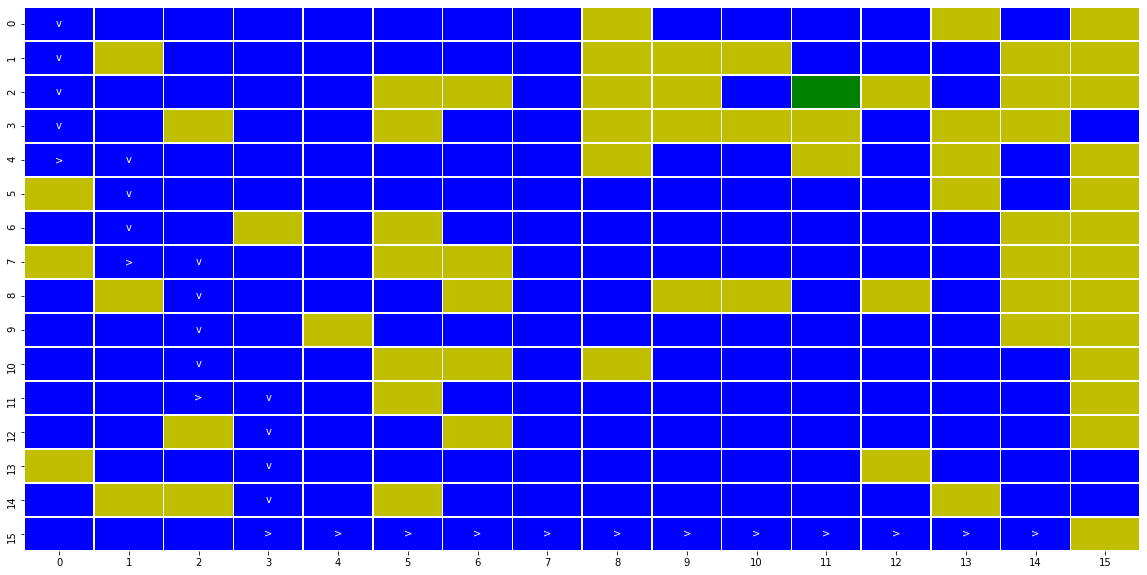

Total Reward:  1.0   31


In [8]:
print("P_4 ", P_4)
print("V_4 ", V_4)
print("Pp_4 ", Pp_4)
print("Vp_4 ", Vp_4)
display_value_iteration(P_4,V_4)
display_value_iteration(Pp_4,Vp_4)